This writeup is to solve cat vs dog classification problem using pretrained CNN model - VGG16.
We will first start with basic CNN model and check for approaches to improve accuracy. Lastly we will use VGG16 and confirm improvement in accuracy using pre learned weights.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, shutil
import zipfile

#We have train.zip and test.zip as input files. 
#Train and test directories have 6250 images of each class i.e. dog and cat.
#So we have 12500 inputs images which we will further divide to train and validation sets

with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/train.zip", 'r') as zip_ref:
    zip_ref.extractall("/kaggle/working/dogs-vs-cats/")
    
with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/test1.zip", 'r') as zip_ref:
    zip_ref.extractall("/kaggle/working/dogs-vs-cats/")    

test_dir = os.path.join("/kaggle/working/dogs-vs-cats/", 'test1')

In [2]:
#We will further create seperate directories for each class
original_dataset_dir = '/kaggle/working/dogs-vs-cats/'
base_dir = '/kaggle/working/'
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(8000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
#Lets see how many rows of train and validation data we have for each class
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


total training cat images: 8000
total training dog images: 8000
total validation cat images: 4500
total validation dog images: 4500


Using TensorFlow backend.


Found 16000 images belonging to 2 classes.
Found 9000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 12s 123ms/step - loss: 0.6898 - acc: 0.5260 - val_loss: 0.6364 - val_acc: 0.5210
Epoch 2/10
100/100 [==============================] - 8s 84ms/step - loss: 0.6663 - acc: 0.5940 - val_loss: 0.6854 - val_acc: 0.6550
Epoch 3/10
100/100 [==============================] - 8s 83ms/step - loss: 0.6400 - acc: 0.6285 - val_loss: 0.6850 - val_acc: 0.6830
Epoch 4/10
100/100 [==============================] - 9s 87ms/step - loss: 0.6058 - acc: 0.6625 - val_loss: 0.5383 - val_acc: 0.6190
Epoch 5/10
100/100 [==============================] - 9s 89ms/step - loss: 0.6083 - acc: 0.6815 - val_loss: 0.6560 - val_acc: 0.7140
Epoch 6/10
100/100 [==============================] - 8s 85ms/step - loss: 0.5806 - acc: 0.6860 - val_loss: 0.4669 - val_acc: 0.7080
Epoch 7/10
100/100 [==============================] - 8s 81ms/step - loss: 0.5664 - acc: 0.7015 - val_loss: 0.5436 

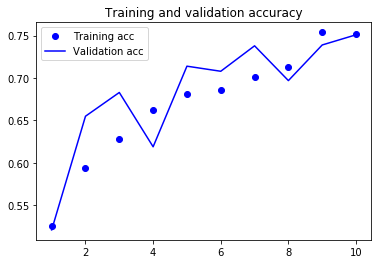

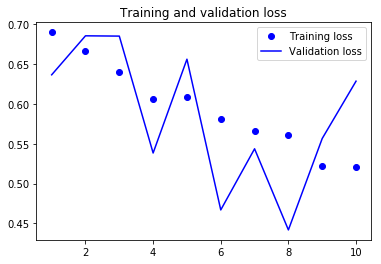

In [4]:
#Model without using any pretrained weights
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,target_size=(150, 150),batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=20,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=10,
validation_data=validation_generator,
validation_steps=50)

model.save('cats_and_dogs_small_1.h5') #Save model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Lets try to improve our scores by applying data augmentation on input images

In [5]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=10,
validation_data=validation_generator,
validation_steps=50)

model.save('cats_and_dogs_small_2.h5') #Save model

Found 16000 images belonging to 2 classes.
Found 9000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 30s 300ms/step - loss: 0.6923 - acc: 0.5269 - val_loss: 0.6289 - val_acc: 0.5006
Epoch 2/10
100/100 [==============================] - 26s 264ms/step - loss: 0.6865 - acc: 0.5375 - val_loss: 0.6624 - val_acc: 0.6181
Epoch 3/10
100/100 [==============================] - 27s 273ms/step - loss: 0.6744 - acc: 0.5725 - val_loss: 0.6554 - val_acc: 0.6381
Epoch 4/10
100/100 [==============================] - 27s 267ms/step - loss: 0.6593 - acc: 0.6009 - val_loss: 0.6523 - val_acc: 0.6475
Epoch 5/10
100/100 [==============================] - 27s 272ms/step - loss: 0.6491 - acc: 0.6134 - val_loss: 0.6004 - val_acc: 0.6388
Epoch 6/10
100/100 [==============================] - 26s 264ms/step - loss: 0.6328 - acc: 0.6409 - val_loss: 0.6962 - val_acc: 0.6808
Epoch 7/10
100/100 [==============================] - 28s 284ms/step - loss: 0.6275 - acc: 0.6434 - val_l

Finally we would use VGG16 model and verify if there is improvement in Accuracy

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

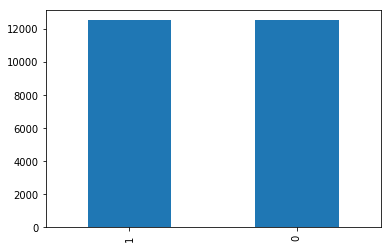

In [6]:
filenames = os.listdir("/kaggle/working/dogs-vs-cats/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df.head()
df['category'].value_counts().plot.bar()

from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

conv_base.summary()

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 16,812,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_base.trainable = False
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/kaggle/working/dogs-vs-cats/train", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=500
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/kaggle/working/dogs-vs-cats/train", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=500
)

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
test_datagen = ImageDataGenerator(rescale=1./255)

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=40,
epochs=10,
validation_data=validation_generator,
validation_steps=10)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Epoch 1/10
40/40 [==============================] - 173s 4s/step - loss: 0.5903 - acc: 0.6894 - val_loss: 0.4462 - val_acc: 0.8022
Epoch 2/10
40/40 [==============================] - 168s 4s/step - loss: 0.4647 - acc: 0.7878 - val_loss: 0.3684 - val_acc: 0.8488
Epoch 3/10
40/40 [==============================] - 165s 4s/step - loss: 0.4086 - acc: 0.8192 - val_loss: 0.3218 - val_acc: 0.8672
Epoch 4/10
40/40 [==============================] - 166s 4s/step - loss: 0.3840 - acc: 0.8299 - val_loss: 0.2672 - val_acc: 0.8784
Epoch 5/10
40/40 [==============================] - 167s 4s/step - loss: 0.3675 - acc: 0.8365 - val_loss: 0.2704 - val_acc: 0.8810
Epoch 6/10
40/40 [==============================] - 165s 4s/step - loss: 0.3550 - acc: 0.8421 - val_loss: 0.2505 - val_acc: 0.8892
Epoch 7/10
40/40 [==============================] - 164s 4s/step - loss: 0.3459 - acc: 0.84

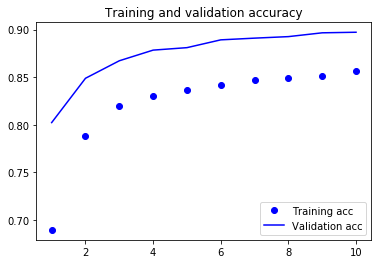

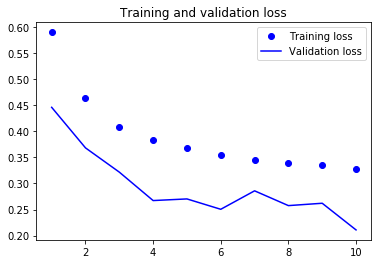

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
model.save_weights("model.h5")

In [ ]:
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

test_dir='/kaggle/working/dogs-vs-cats/test1'


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 2 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 0 validated image filenames.


In [ ]:

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dir, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150, 150),
    batch_size=50,
    shuffle=False
)

predict = model.predict_generator(test_generator, steps=250)
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dogs': 1, 'cats': 0 })
test_df['category'].value_counts().plot.bar()

In [ ]:
from keras.preprocessing.image import load_img
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(test_dir+"//"+filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()